In [7]:
import pandas as pd
df = pd.read_csv("/Users/yuvaraj/GUVI CLASSESS/Amazon Music/single_genre_artists.csv")
print("Shape (rows, columns):", df.shape)

print(df.columns.tolist())



Shape (rows, columns): (95837, 23)
['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres', 'name_artists', 'popularity_artists']


In [26]:

display(df.head())
print(df.info())


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,2.690450
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,3.724000
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,3.471117
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,2.698883
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,2.799550


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      95837 non-null  float64
 1   energy            95837 non-null  float64
 2   loudness          95837 non-null  float64
 3   speechiness       95837 non-null  float64
 4   acousticness      95837 non-null  float64
 5   instrumentalness  95837 non-null  float64
 6   liveness          95837 non-null  float64
 7   valence           95837 non-null  float64
 8   tempo             95837 non-null  float64
 9   duration_min      95837 non-null  float64
dtypes: float64(10)
memory usage: 7.3 MB
None


In [8]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [30]:
#Data Exploration & Preprocessing

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Explore the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Index: 94098 entries, 0 to 95836
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      94098 non-null  float64
 1   energy            94098 non-null  float64
 2   loudness          94098 non-null  float64
 3   speechiness       94098 non-null  float64
 4   acousticness      94098 non-null  float64
 5   instrumentalness  94098 non-null  float64
 6   liveness          94098 non-null  float64
 7   valence           94098 non-null  float64
 8   tempo             94098 non-null  float64
 9   duration_min      94098 non-null  float64
dtypes: float64(10)
memory usage: 7.9 MB
None
       danceability        energy      loudness   speechiness  acousticness  \
count  94098.000000  94098.000000  94098.000000  94098.000000  94098.000000   
mean       0.586882      0.540836    -10.177943      0.170598      0.459301   
std        0.155362      0.236028      4.758303  

In [31]:
#  Remove duplicates if any
df = df.drop_duplicates()

In [32]:

# Drop unnecessary columns (non-numeric)
df = df.drop(['track_name', 'artist_name', 'track_id'], axis=1, errors='ignore')


In [34]:

# Check numeric columns
print("Numeric columns available:", df.columns)



Numeric columns available: Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')


In [36]:
#  Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [37]:
# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,-0.153720,-1.511843,-0.752175,-0.430401,1.617109,-0.350286,0.535674,0.320588,0.516299,-0.398832
1,-1.029100,-1.528790,-1.092214,-0.373446,1.604989,-0.350353,-0.522284,-0.578519,-1.291414,0.126386
2,-0.488424,-1.418633,-1.121426,-0.401563,1.623169,-0.350353,1.035116,-0.376926,-1.556670,-0.002122
3,0.573618,-0.312827,-0.465517,-0.020180,1.611049,-0.350353,-0.033583,0.610883,0.406670,-0.394546
4,0.406266,-1.028847,-0.762473,-0.117508,1.611049,-0.350353,0.793451,1.086644,-1.374439,-0.343390


In [ ]:
#  Feature Selection

features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'  # may not exist in your df
]

features = [f for f in features if f in df.columns]

df_selected = df[features]

In [57]:

# Check for missing values
print("Missing values before:", df_selected.isna().sum().sum())
df_selected = df_selected.dropna()
print("Shape after dropping missing values:", df_selected.shape)

Missing values before: 0
Shape after dropping missing values: (94098, 9)


In [58]:

# convert duration to minutes if duration_ms exists
if 'duration_ms' in df_selected.columns:
    df_selected['duration_min'] = df_selected['duration_ms'] / 60000
    df_selected = df_selected.drop(columns=['duration_ms'])


In [59]:

print("Columns ready for clustering:", df_selected.columns.tolist())
df_selected.head()

Columns ready for clustering: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950


Explained variance ratio: [0.27091257 0.1884486 ]


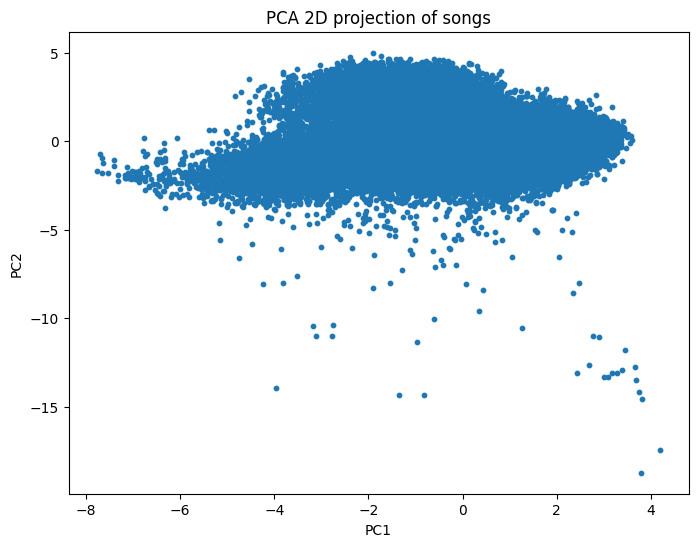

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to scaled features
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)  

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot of 2D PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D projection of songs')
plt.show()


In [67]:
# Clustering Techniques

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df_sample = df_scaled.sample(n=min(2000, len(df_scaled)), random_state=42)


# range of k to try
K = range(2, 11)  # try 2 to 10 clusters
sse = []          # Sum of Squared Errors for Elbow
sil_scores = []   # Silhouette scores



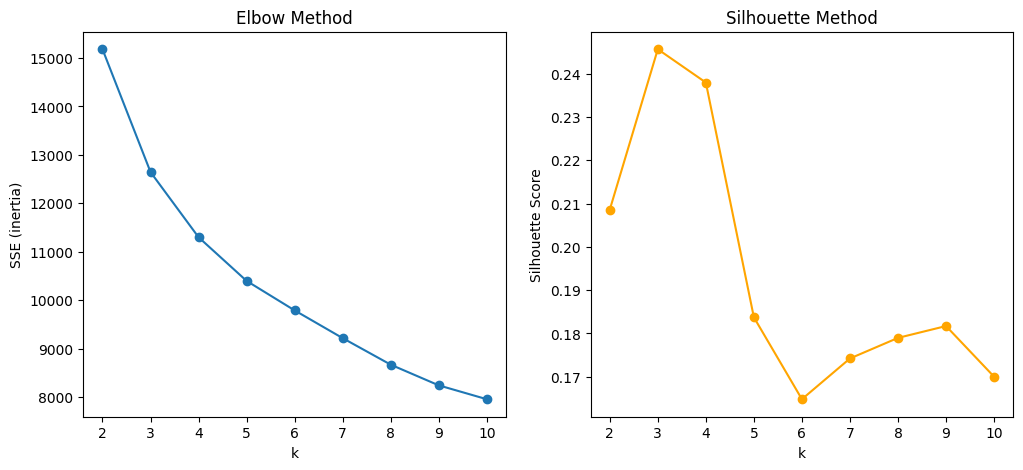

In [69]:
# Loop over k values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_sample)  # use scaled features
    sse.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_sample, labels))

# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, sse, '-o')
plt.xlabel('k')
plt.ylabel('SSE (inertia)')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, '-o', color='orange')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [99]:
best_k = 5 # K-Means to create 4 clusters
kmeans_final = KMeans(n_clusters=best_k, random_state=42) #scaled features and assigns each song a cluster label
df_scaled['cluster'] = kmeans_final.fit_predict(df_scaled)


In [115]:
print(df_scaled['cluster'].value_counts())


cluster
2    28626
1    27050
4    18808
3    12223
0     7391
Name: count, dtype: int64


In [116]:
#Cluster Evaluation and Interpretation

from sklearn.metrics import silhouette_score
df_sample = df_scaled.sample(n=min(2000, len(df_scaled)), random_state=42)

sil_score = silhouette_score(df_sample.drop(columns='cluster'), df_sample['cluster'])
print("Silhouette Score (sample):", round(sil_score, 3))


Silhouette Score (sample): 0.177


In [117]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df_scaled.drop(columns='cluster'), df_scaled['cluster'])
print("Davies-Bouldin Index:", round(db_index, 3))

Davies-Bouldin Index: 1.722


In [104]:
inertia = kmeans_final.inertia_
print("Inertia (SSE):", round(inertia, 2))


Inertia (SSE): 543109.6


In [124]:
df_features_clustered = df_selected.copy()
df_features_clustered['cluster'] = df_scaled['cluster']

# each feature for each cluster 
cluster_profile = df_features_clustered.groupby('cluster').mean().T 
print("Cluster Feature Means:") 
display(cluster_profile)

Cluster Feature Means:


cluster,0.0,1.0,2.0,3.0,4.0
danceability,0.567721,0.586404,0.574813,0.617336,0.591982
energy,0.508453,0.556141,0.529492,0.507856,0.567724
loudness,-10.464729,-9.807414,-10.238197,-11.641311,-9.619554
speechiness,0.124160,0.126099,0.113139,0.481911,0.137848
acousticness,0.542867,0.429647,0.478780,0.494488,0.420895
instrumentalness,0.139149,0.073567,0.101639,0.032168,0.069591
liveness,0.217766,0.209640,0.208464,0.324649,0.214175
valence,0.572465,0.574538,0.571647,0.581588,0.577739
tempo,117.017825,119.160089,118.288111,109.471429,118.984610


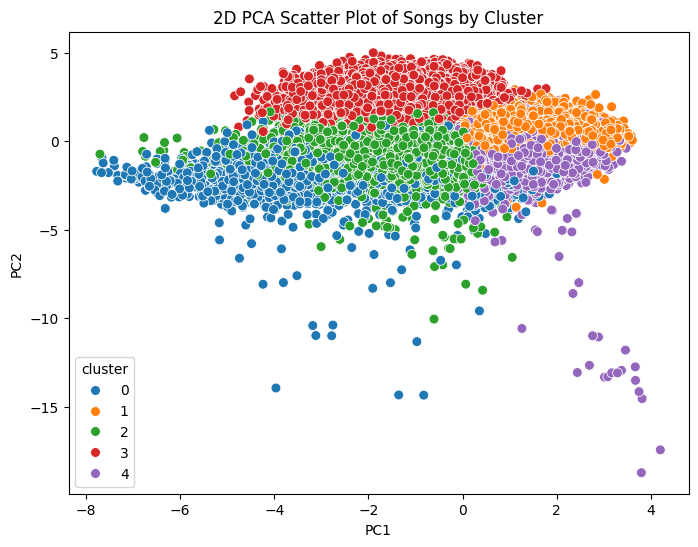

In [107]:
#Visualizing clusters

# 2D scatter plots

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce features to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled.drop(columns='cluster'))

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_scaled['cluster'].values

# Scatter plot with clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=50)
plt.title('2D PCA Scatter Plot of Songs by Cluster')
plt.show()


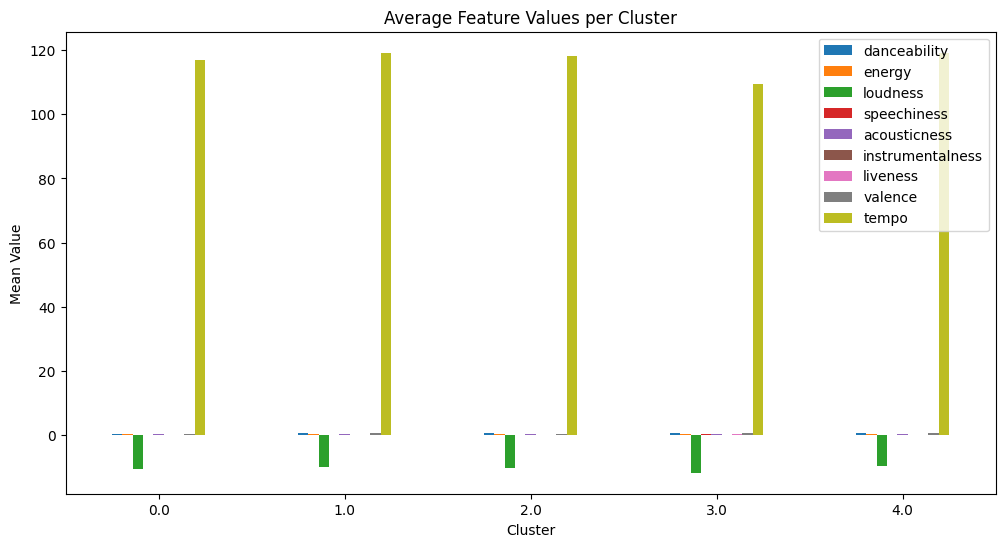

In [108]:
# Bar charts showing average feature values per cluster.


#Average feature values per cluster (using unscaled features)

cluster_profile = df_features_clustered.groupby('cluster').mean()

# Bar chart for each feature
cluster_profile.plot(kind='bar', figsize=(12,6))
plt.title("Average Feature Values per Cluster")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()


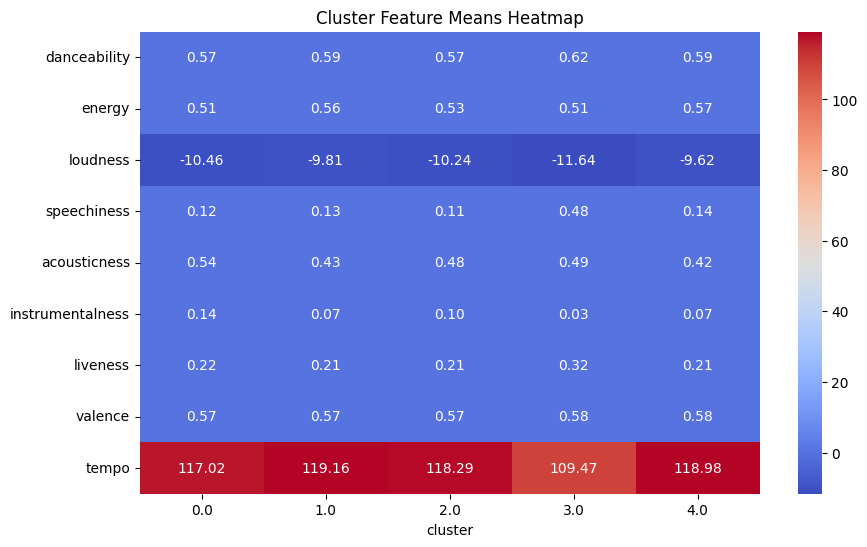

In [109]:
#Heatmaps comparing features across clusters.


plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cluster Feature Means Heatmap")
plt.show()


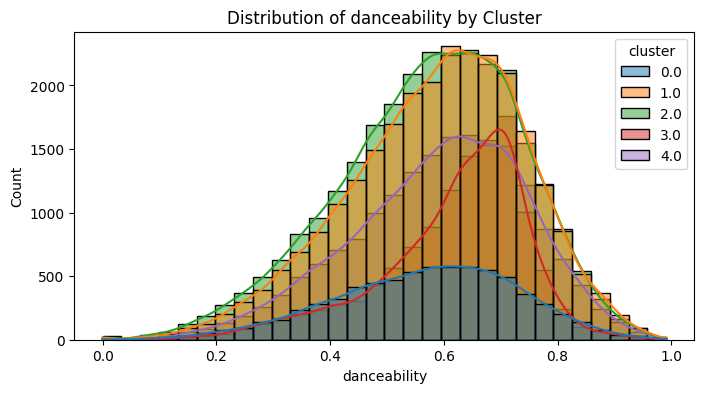

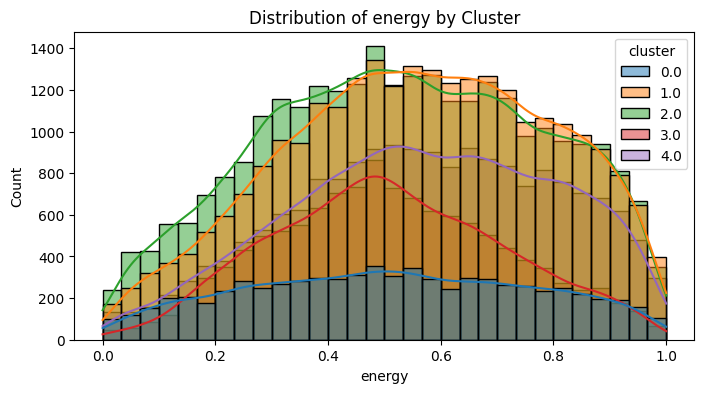

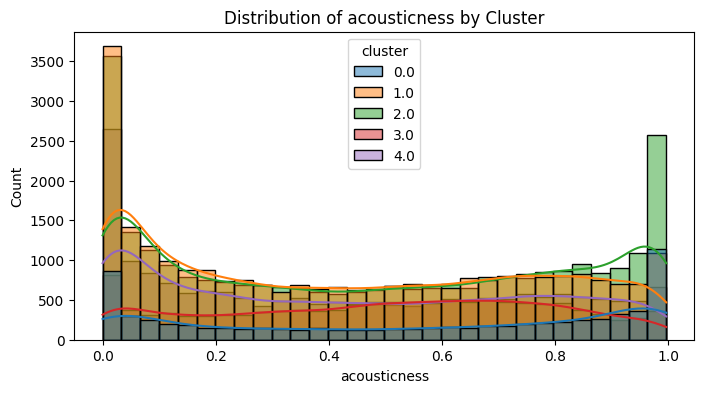

In [110]:
#Distribution plots for features like danceability, tempo, etc. within each cluster.

features_to_plot = ['danceability', 'energy', 'acousticness']

for f in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_features_clustered, x=f, hue='cluster', kde=True, palette='tab10', bins=30)
    plt.title(f'Distribution of {f} by Cluster')
    plt.show()


In [111]:

# Final Analysis and Export

df_final = df.copy()

# Add the cluster labels from K-Means
df_final['cluster'] = df_scaled['cluster']

# Check the first 5 rows
df_final.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,2.690450,2.0
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,3.724000,2.0
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,3.471117,2.0
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,2.698883,2.0
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,2.799550,2.0


In [112]:
# show top 5 songs per cluster (sorted by danceability )

for c in sorted(df_final['cluster'].unique()):
    print(f"\nCluster {c} - Top 5 songs by danceability:")
    display(df_final[df_final['cluster'] == c].sort_values('danceability', ascending=False).head())



Cluster 0.0 - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
79807,0.980,0.397,-10.081,0.0935,0.04470,0.00000,0.2080,0.701,116.022,3.413800,0.0
69444,0.979,0.888,-6.741,0.0573,0.00453,0.08110,0.0684,0.806,122.022,2.395933,0.0
52585,0.973,0.146,-10.850,0.2660,0.99400,0.07930,0.1010,0.974,132.071,1.693333,0.0
32831,0.971,0.452,-8.872,0.0507,0.18900,0.00003,0.5710,0.771,115.012,1.398217,0.0
85003,0.970,0.494,-8.010,0.0608,0.67500,0.00689,0.0925,0.518,114.001,1.578950,0.0



Cluster 1.0 - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
35462,0.980,0.413,-11.052,0.1010,0.6710,0.000079,0.170,0.764,119.993,3.002317,1.0
47319,0.979,0.608,-11.108,0.0656,0.0133,0.020400,0.331,0.953,120.067,3.940667,1.0
50379,0.977,0.598,-6.125,0.2070,0.0545,0.000196,0.125,0.665,129.988,3.927783,1.0
52771,0.975,0.847,-3.326,0.2930,0.1630,0.000942,0.501,0.867,118.023,2.197833,1.0
30683,0.975,0.607,-6.356,0.0428,0.0241,0.000006,0.112,0.972,124.037,3.179117,1.0



Cluster 2.0 - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
24264,0.978,0.437,-9.245,0.0660,0.153000,0.000001,0.0520,0.857,115.494,3.674217,2.0
33659,0.975,0.448,-9.585,0.3200,0.000974,0.848000,0.2690,0.203,126.014,7.846883,2.0
12004,0.975,0.491,-12.988,0.0673,0.005830,0.000252,0.0447,0.821,119.427,3.151117,2.0
68816,0.973,0.490,-9.518,0.0542,0.235000,0.000000,0.1210,0.916,118.061,2.890000,2.0
82177,0.973,0.494,-6.231,0.3610,0.845000,0.000000,0.0976,0.969,117.107,1.300000,2.0



Cluster 3.0 - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
82374,0.969,0.399,-8.575,0.0865,0.7670,0.000000,0.1780,0.962,111.010,4.181550,3.0
82361,0.964,0.519,-8.202,0.0475,0.5300,0.000001,0.0914,0.988,120.180,1.848000,3.0
85312,0.963,0.777,-9.375,0.0592,0.0609,0.012800,0.0371,0.963,126.315,3.209767,3.0
85002,0.963,0.482,-6.807,0.0433,0.1610,0.000000,0.1020,0.863,115.092,0.833333,3.0
39072,0.959,0.470,-11.530,0.1660,0.3580,0.000000,0.0806,0.964,129.995,2.248000,3.0



Cluster 4.0 - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster
82257,0.991,0.422,-11.093,0.2470,0.307,0.017600,0.0788,0.994,119.975,1.411783,4.0
82264,0.982,0.526,-7.523,0.0591,0.357,0.000000,0.1060,0.981,110.046,1.092883,4.0
82652,0.977,0.591,-9.125,0.0476,0.446,0.000013,0.0475,0.973,109.995,1.571617,4.0
32832,0.975,0.438,-10.220,0.0901,0.431,0.000000,0.0618,0.979,109.988,2.166667,4.0
50641,0.974,0.643,-8.857,0.0452,0.105,0.001410,0.0833,0.967,117.985,4.211333,4.0



Cluster nan - Top 5 songs by danceability:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,cluster


In [113]:
# Save the dataset with cluster labels

df_final.to_csv("Final_amazon_music.csv", index=False)
print("✅ Final dataset exported as 'Final_amazon_music.csv'")


✅ Final dataset exported as 'Final_amazon_music.csv'
